In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import datetime
warnings.filterwarnings('ignore')

# Setup Seaborn
sns.set_style("whitegrid")

In [2]:
#Read file into a DataFrame and print head.
xword_data = pd.ExcelFile('../data/NYT_XWord_data.xlsx', engine='openpyxl')
print(xword_data.sheet_names)

['Sheet1']


In [3]:
df1 = xword_data.parse('Sheet1')

In [4]:
df1.head(35)

,Puzzle_Date,Completed_Date (IS1),Completed_Date (IS2),Day_of_Week,Time (s) (IS1),Time (s) (IS2),Global_Median_Solver_Time(s),Difficulty,Median_Solver%_AVG_PM,Grid Size,...,Supersym,90_180_Rot_Sym,LR_UD_Sym,Diag_Sym,Black_Square_Fill,Outside_Grid,Unchecked_Sq,Uniclue,Duplicate_Answers,Quantum
0,2023-12-26,2023-12-26 08:15:55,2023-12-26 10:52:11,Tuesday,391.0,441.0,499,Hard,3,1,...,0,0,0,0,0,0,0,0,0,0
1,2023-12-25,2023-12-25 08:22:02,2023-12-25 10:23:57,Monday,315.0,344.0,351,Hard,2,1,...,0,0,0,0,0,0,0,0,0,0
2,2023-12-24,2023-12-23 18:37:23,2023-12-23 23:27:09,Sunday,1210.0,1917.0,1850,Hard,4,2,...,0,0,0,0,0,0,0,0,0,0
3,2023-12-23,2023-12-23 07:36:04,2023-12-23 18:53:42,Saturday,935.0,2058.0,1373,Average,-13,1,...,0,0,0,0,0,0,0,0,0,0
4,2023-12-22,2023-12-22 08:00:02,2023-12-22 08:08:59,Friday,826.0,780.0,1127,Hard,7,1,...,0,0,0,0,0,0,0,0,0,0
5,2023-12-21,2023-12-21 08:03:20,2023-12-21 18:17:17,Thursday,667.0,701.0,893,Average,-18,1,...,0,0,0,0,0,0,0,0,0,0
6,2023-12-20,2023-12-20 07:12:07,2023-12-20 07:18:38,Wednesday,336.0,776.0,833,Hard,14,1,...,0,0,0,0,0,0,0,0,0,0
7,2023-12-19,2023-12-19 08:07:20,2023-12-19 20:43:28,Tuesday,453.0,511.0,510,Hard,14,1,...,0,0,0,0,0,0,0,0,0,0
8,2023-12-18,2023-12-18 07:40:50,2023-12-18 17:43:35,Monday,289.0,307.0,358,Average,-1,1,...,0,0,0,0,0,0,0,0,0,0
9,2023-12-17,2023-12-17 09:54:03,2023-12-18 16:13:40,Sunday,1253.0,1594.0,1538,Average,-17,2,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Puzzle_Date                   2186 non-null   datetime64[ns]
 1   Completed_Date (IS1)          1142 non-null   datetime64[ns]
 2   Completed_Date (IS2)          975 non-null    datetime64[ns]
 3   Day_of_Week                   2186 non-null   object        
 4   Time (s) (IS1)                1142 non-null   float64       
 5   Time (s) (IS2)                975 non-null    float64       
 6   Global_Median_Solver_Time(s)  2186 non-null   int64         
 7   Difficulty                    2186 non-null   object        
 8   Median_Solver%_AVG_PM         2186 non-null   int64         
 9   Grid Size                     2186 non-null   int64         
 10  No_Constructors               2185 non-null   float64       
 11  Constructors(by seniority)    

In [6]:
#df1 = df1.loc[(df1["Day_of_Week"] != "Sunday")]

In [7]:
# A numerical column for puzzle day that starts with Sunday and ends with Saturday
df1.loc[(df1["Day_of_Week"] == "Sunday"), "Day_of_Week_num"] = 1 
df1.loc[(df1["Day_of_Week"] == "Monday"), "Day_of_Week_num"] = 2
df1.loc[(df1["Day_of_Week"] == "Tuesday"), "Day_of_Week_num"] = 3
df1.loc[(df1["Day_of_Week"] == "Wednesday"), "Day_of_Week_num"] = 4
df1.loc[(df1["Day_of_Week"] == "Thursday"), "Day_of_Week_num"] = 5
df1.loc[(df1["Day_of_Week"] == "Friday"), "Day_of_Week_num"] = 6
df1.loc[(df1["Day_of_Week"] == "Saturday"), "Day_of_Week_num"] = 7

In [8]:
df1 = df1.sort_values(by=['Day_of_Week_num'], ascending = False)

In [9]:
df_labels = df1.copy()
df_labels.head()

,Puzzle_Date,Completed_Date (IS1),Completed_Date (IS2),Day_of_Week,Time (s) (IS1),Time (s) (IS2),Global_Median_Solver_Time(s),Difficulty,Median_Solver%_AVG_PM,Grid Size,...,90_180_Rot_Sym,LR_UD_Sym,Diag_Sym,Black_Square_Fill,Outside_Grid,Unchecked_Sq,Uniclue,Duplicate_Answers,Quantum,Day_of_Week_num
220,2023-05-20,2023-05-19 22:13:57,2023-05-20 09:00:03,Saturday,602.0,1450.0,1289,Easy,-22,1,...,0,0,0,0,0,0,0,0,0,7.0
1109,2020-12-12,2022-09-14 14:44:14,NaT,Saturday,1011.0,NaN,1996,Average,-1,1,...,0,0,0,0,0,0,0,0,0,7.0
899,2021-07-10,2022-08-20 16:05:08,NaT,Saturday,814.0,NaN,1951,Hard,12,1,...,0,0,0,0,0,0,0,0,0,7.0
1662,2019-06-08,NaT,NaT,Saturday,NaN,NaN,1710,Average,-2,1,...,0,0,0,0,0,0,0,0,0,7.0
1571,2019-09-07,NaT,NaT,Saturday,NaN,NaN,2111,Hard,6,1,...,0,0,0,0,0,0,0,0,0,7.0


In [21]:
df_PCA = df1.copy()

In [22]:
# Pare down to columns potentially useful for PCA
df_PCA = df_PCA[['Words', 'Blocks', 'Unused_Letters', 'Spans', 'Stacks', 'Unique_Answers',
                'Rebus_Count', 'Rebus_Unique', 'Cheater_Squares', 'AWL', 'Scrabble_Score', 'Scrabble_Avg', 'FITB', 'Cross_Ref_Clues', 'Scrabble_Illegal',
                 'Open_Squares', 'Freshness_Factor', 'Overall_Freshness%', 'Duplicate_Clues', 'Circle_Count', 'Shade_Count', 'Unusual_Sym']]

In [23]:
df_PCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 220 to 1913
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Words               2186 non-null   int64  
 1   Blocks              2186 non-null   int64  
 2   Unused_Letters      2186 non-null   int64  
 3   Spans               2186 non-null   int64  
 4   Stacks              2186 non-null   int64  
 5   Unique_Answers      2186 non-null   int64  
 6   Rebus_Count         2186 non-null   int64  
 7   Rebus_Unique        2186 non-null   int64  
 8   Cheater_Squares     2186 non-null   int64  
 9   AWL                 2186 non-null   float64
 10  Scrabble_Score      2053 non-null   float64
 11  Scrabble_Avg        2186 non-null   float64
 12  FITB                2186 non-null   int64  
 13  Cross_Ref_Clues     2186 non-null   int64  
 14  Scrabble_Illegal    2186 non-null   int64  
 15  Open_Squares        2186 non-null   int64  
 16  Fres

In [24]:
#Impute missing values in "Scrabble_Score"
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_PCA["Scrabble_Score"] = imputer.fit_transform(df_PCA["Scrabble_Score"].values.reshape(-1,1))[:,0]

In [25]:
#Transform features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df_PCA)

In [26]:
#Instantiate PCA object
from sklearn.decomposition import PCA

In [33]:
#Fit and transform
principal = PCA(n_components=3)
x = principal.fit_transform(scaled_df)

In [34]:
#How much variance is explained by each principal component?
print(principal.explained_variance_ratio_)

[0.24723315 0.14488002 0.08369876]


In [43]:
var_explained = 0.24723315 + 0.14488002 + 0.08369876
var_explained

0.47581193

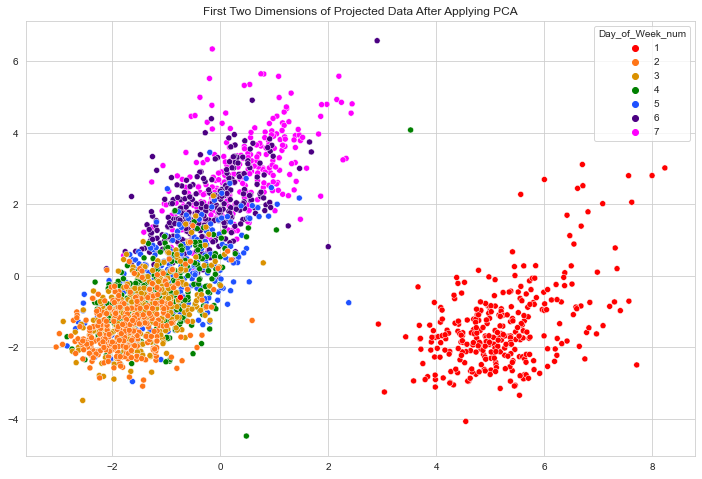

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x[:, 0], x[:, 1], hue=df_labels["Day_of_Week_num"],
                palette=["red","#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], hue_order = [1,2,3,4,5,6,7])
plt.title('First Two Dimensions of Projected Data After Applying PCA')
plt.show()

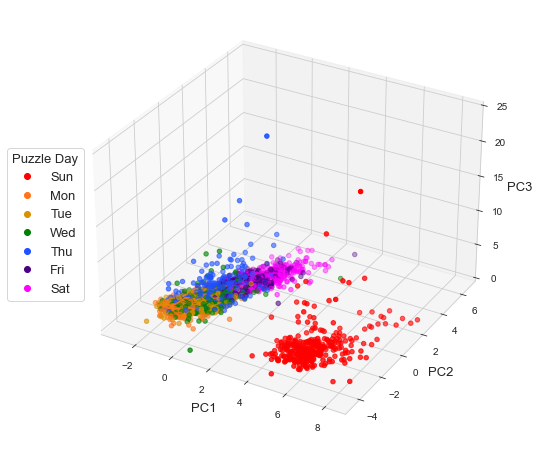

In [45]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import BoundaryNorm, ListedColormap
fig = plt.figure(figsize=(8,8))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
cmap = ListedColormap(["red","#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"])

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
plotty = axis.scatter(x[:,0],x[:,1],x[:,2], c=df_labels['Day_of_Week_num'],cmap=cmap)
axis.set_xlabel("PC1", fontsize=13)
axis.set_ylabel("PC2", fontsize=13)
axis.set_zlabel("PC3", fontsize=13)
axis.set_zlim(0,25)

labels = np.unique(df_labels['Day_of_Week_num'])
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=plotty.cmap(plotty.norm(yi))) for yi in labels]
labels=["Sun", "Mon", "Tue", "Wed","Thu","Fri","Sat"]
plt.legend(handles, labels, loc="center right", bbox_to_anchor=(.05, 0.5), title="Puzzle Day", fontsize=13, title_fontsize=13)


In [20]:
# Vary no. of principle components
nums = np.arange(30)

var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(scaled_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

ValueError: n_components=24 must be between 0 and min(n_samples, n_features)=23 with svd_solver='full'

In [ ]:
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

### Distributions of Global Median Solve Times Per Puzzle Day

In [46]:
# Convert global median solve times per puzzle to minutes and drop times in seconds
df1["GMST(m)"] = df1["Global_Median_Solver_Time(s)"]/60  #GMST = Global Median solve times
df1.drop(['Global_Median_Solver_Time(s)'], axis=1, inplace=True)

In [47]:
# It will be useful to have year of puzzle issue in a separate column for analysis below
df1['P_Yr'] = df1['Puzzle_Date'].dt.to_period('Y')
df1['P_Yr'].value_counts()

2020    366
2021    365
2019    365
2022    365
2018    365
2023    360
Freq: A-DEC, Name: P_Yr, dtype: int64

In [48]:
# Filter down to 2020-2023
df1_recent = [(df1["P_Yr"] == "2021") | (df1["P_Yr"] == "2022") | (df1["P_Yr"] == "2023")]
df1_recent = df1.loc[(df1["P_Yr"] == "2018") | (df1["P_Yr"] == "2019") | (df1["P_Yr"] == "2020") | (df1["P_Yr"] == "2021") | (df1["P_Yr"] == "2022") | (df1["P_Yr"] == "2023")]

In [49]:
df1_recent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 220 to 1913
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Puzzle_Date                   2186 non-null   datetime64[ns]
 1   Completed_Date (IS1)          1142 non-null   datetime64[ns]
 2   Completed_Date (IS2)          975 non-null    datetime64[ns]
 3   Day_of_Week                   2186 non-null   object        
 4   Time (s) (IS1)                1142 non-null   float64       
 5   Time (s) (IS2)                975 non-null    float64       
 6   Difficulty                    2186 non-null   object        
 7   Median_Solver%_AVG_PM         2186 non-null   int64         
 8   Grid Size                     2186 non-null   int64         
 9   No_Constructors               2185 non-null   float64       
 10  Constructors(by seniority)    2186 non-null   object        
 11  1st_Constructor             

In [50]:
# A numerical column for puzzle day that starts with Sunday and ends with Saturday
df1_recent.loc[(df1_recent["Day_of_Week"] == "Sunday"), "DOW_num"] = 1 
df1_recent.loc[(df1_recent["Day_of_Week"] == "Monday"), "DOW_num"] = 2
df1_recent.loc[(df1_recent["Day_of_Week"] == "Tuesday"), "DOW_num"] = 3
df1_recent.loc[(df1_recent["Day_of_Week"] == "Wednesday"), "DOW_num"] = 4
df1_recent.loc[(df1_recent["Day_of_Week"] == "Thursday"), "DOW_num"] = 5
df1_recent.loc[(df1_recent["Day_of_Week"] == "Friday"), "DOW_num"] = 6
df1_recent.loc[(df1_recent["Day_of_Week"] == "Saturday"), "DOW_num"] = 7

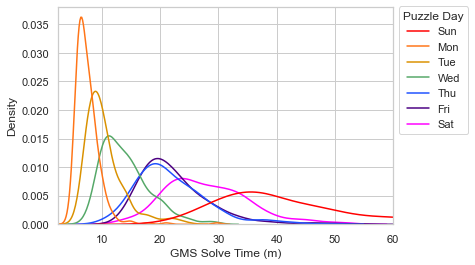

In [51]:
# Density plot of GMS Times in overall time range (2020-2023)
df1_recent['plot_seq_map'] = df1_recent['DOW_num'].map({1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri', 7:'Sat'})
sns.set(style="whitegrid")
ax = sns.kdeplot(data=df1_recent, x = "GMST(m)", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], hue_order=["Sun", "Mon", "Tue","Wed", "Thu", "Fri", "Sat"], legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.027), title='Puzzle Day')

plt.xlim(2.5, 60)
ax.set_xlabel("GMS Solve Time (m)")
plt.show()